In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
benign_train = 'C:/Users/Admin/Downloads/archive/data/train/benign'
malignant_train = 'C:/Users/Admin/Downloads/archive/data/train/malignant'
benign_test = 'C:/Users/Admin/Downloads/archive/data/test/benign'
malignant_test = 'C:/Users/Admin/Downloads/archive/data/test/malignant'


In [3]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))  # Load in training pictures


In [4]:
ims_benign = [read(os.path.join(benign_train, filename)) for filename in os.listdir(benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(malignant_train, filename)) for filename in os.listdir(malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')
ims_benign = [read(os.path.join(benign_test, filename)) for filename in os.listdir(benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(malignant_test, filename)) for filename in os.listdir(malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [5]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [6]:
# Merge data
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [7]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

In [8]:
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

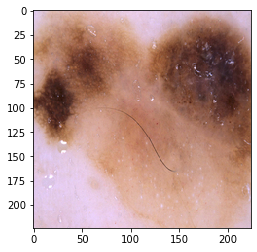

In [9]:
plt.imshow(X_test[1], interpolation='nearest')
plt.show()

In [10]:
X_train = X_train/255
X_test = X_test/255


In [11]:
import tensorflow as tf


In [12]:
X_Train = tf.keras.utils.normalize(X_train)
X_Test = tf.keras.utils.normalize(X_test)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3), input_shape = X_Train.shape[1:] ,activation = tf.nn.relu ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=None))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

In [14]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Flatten
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                        patience=5,                         
                        verbose=1,                         
                        restore_best_weights=True)
callbacks=[earlystop]
model.fit(X_Train, y_train, epochs = 5,callbacks=callbacks, shuffle=True,batch_size=50, validation_split = 0.1)

Epoch 1/5
48/48 [==============================] - 202s 3s/step - loss: 1.6356 - accuracy: 0.6123 - val_loss: 0.5175 - val_accuracy: 0.7386
Epoch 2/5
48/48 [==============================] - 87s 2s/step - loss: 0.5340 - accuracy: 0.7337 - val_loss: 0.5249 - val_accuracy: 0.7500
Epoch 3/5
48/48 [==============================] - 62s 1s/step - loss: 0.4985 - accuracy: 0.7404 - val_loss: 0.4690 - val_accuracy: 0.7652
Epoch 4/5
48/48 [==============================] - 59s 1s/step - loss: 0.4628 - accuracy: 0.7611 - val_loss: 0.5163 - val_accuracy: 0.7689
Epoch 5/5
48/48 [==============================] - 60s 1s/step - loss: 0.4422 - accuracy: 0.7708 - val_loss: 0.4798 - val_accuracy: 0.7614


In [17]:
y_pred = model.predict(X_Test)
print("Shape of y_pred:", y_pred.shape)
print("Shape of X_Test:", X_Test.shape)


20/20 [==============================] - 4s 183ms/step
Shape of y_pred: (625, 2)
Shape of X_Test: (625, 224, 224, 3)


In [18]:
from sklearn.metrics import accuracy_score


print("Accuracy Score:", accuracy_score(y_test, yp))


Accuracy Score: 0.7824
